# Text Classification

When we build machine-learning models, we use the text classification technique as a first step to overcome the lack of labels, especially when we 
have two datasets: one dataset with labels and the other without.

This process involves creating a new label for the second dataset using an existing text classification model. Therefore, we define text 
classification as a technique that classifies text content into predefined groups or categories. Here’s a table of a few commonly used classifiers 
for text classification and a brief description of when to use each:

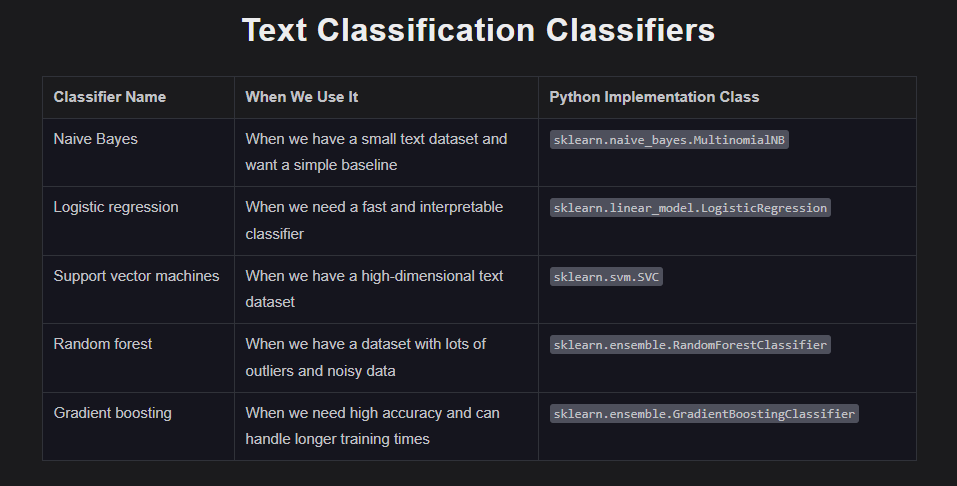


In [ ]:
# Example 1 using reviews data

In [1]:
# a. import necessary libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [3]:
# b. Load labeled dataset

labeled_data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/labeled_reviews.csv')
pd.set_option('display.max_colwidth', 300)
labeled_data.head()

,text,label
0,This movie was fantastic! I couldn't stop watching.,positive
1,The food at this restaurant was delicious.,positive
2,I'm very unhappy with the customer service I received.,negative
3,The product exceeded my expectations.,positive
4,The delivery was late and the item was damaged.,negative


In [4]:
# c. Load unlabeled dataset

unlabeled_data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/unlabeled_reviews.csv')
pd.set_option('display.max_colwidth', 300)
unlabeled_data.head()

,text
0,The weather was perfect for our outdoor event.
1,I'm thinking about buying a new laptop.
2,This hotel has a beautiful view of the ocean.
3,I'm considering switching to a different phone provider.
4,I wonder if this product comes in other colors.


In [7]:
# d. apply TF-IDF for feature extraction 

# instantiate Tfidf vectorizer object
vectorizer = TfidfVectorizer()

# fit and transform the text column and store it in labeled_features variable
labeled_features = vectorizer.fit_transform(labeled_data['text'])

In [8]:
# e. Train a multinomialNB classification model

# instantiate an object
classifier = MultinomialNB()

# train the classifier model
classifier.fit(labeled_features, labeled_data['label'])

MultinomialNB()

In [10]:
# f. apply tf-idf on the unlabeled_data
unlabeled_features = vectorizer.transform(unlabeled_data['text'])

# prediction on unlabeled_data
predicted_labels = classifier.predict(unlabeled_features)

# update the unlabeled_data dataframe
unlabeled_data['predicted_label'] = predicted_labels

print("\nUpdated Unlabeled Data:")

unlabeled_data



Updated Unlabeled Data:


,text,predicted_label
0,The weather was perfect for our outdoor event.,positive
1,I'm thinking about buying a new laptop.,positive
2,This hotel has a beautiful view of the ocean.,positive
3,I'm considering switching to a different phone provider.,neutral
4,I wonder if this product comes in other colors.,positive
5,I need more information before making a decision.,neutral
6,This customer service is terrible.,negative
7,The quality of this product is disappointing.,positive
8,The movie was a waste of time.,positive
9,I regret purchasing this item.,negative


In [ ]:
# Example 2 using feedback data

In [15]:
# a. import necessary libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [16]:
# b. Load labeled dataset

labeled_data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/labeled_feedback.csv')
pd.set_option('display.max_colwidth', 300)
labeled_data.head()

,timestamp,username,feedback,label
0,08-08-2023 10:00,@TechEnthusiast,The new telecom product offers amazing connectivity and lightning-fast speeds. I'm thoroughly impressed!,Positive
1,08-08-2023 10:15,@GadgetGuru,The new telecom product is a game-changer! It's made my online gaming experience so much smoother and lag-free.,Positive
2,08-08-2023 10:30,@FrequentCaller,I've noticed a significant improvement in call quality and signal strength with the new telecom product. Great job!,Positive
3,08-08-2023 10:45,@BusinessOwner,The new product has enhanced our business operations by providing reliable internet for all our devices. A must-have for any office.,Positive
4,08-08-2023 11:00,@DigitalNomad,"As a digital nomad, I rely on consistent internet wherever I go. The new telecom product has kept me connected no matter where I am!",Positive


In [17]:
# c. Load unlabeled dataset

unlabeled_data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data/unlabeled_feedback.csv')
pd.set_option('display.max_colwidth', 300)
unlabeled_data.head()

,timestamp,username,feedback
0,09-08-2023 10:00,@TechSavvyUser,The new telecom product offers impressive download speeds. It's perfect for streaming and gaming.
1,09-08-2023 10:15,@DigitalExplorer,Exploring the digital world has been smoother with the new product. Internet connectivity has been reliable.
2,09-08-2023 11:15,@EffortlessBrowsing,"Browsing the internet is effortless with the new telecom product. Web pages load quickly, and downloads are swift."
3,09-08-2023 11:45,@ContentConsumer,Consuming online content has been a pleasure with the new product. Buffering and lag issues are a thing of the past.
4,09-08-2023 12:15,@EntertainmentJunkie,Entertainment streaming is seamless with the new telecom product. High-quality videos play without interruptions.


In [19]:
# d. apply TF-IDF for feature extraction 

# instantiate Tfidf vectorizer object
vectorizer = TfidfVectorizer()

# fit and transform the text column and store it in labeled_features variable
labeled_features = vectorizer.fit_transform(labeled_data['feedback'])

In [20]:
# e. Train a multinomialNB classification model

# instantiate an object
classifier = MultinomialNB()

# train the classifier model
classifier.fit(labeled_features, labeled_data['label'])

MultinomialNB()

In [21]:
# f. apply tf-idf on the unlabeled_data
unlabeled_features = vectorizer.transform(unlabeled_data['feedback'])

# prediction on unlabeled_data
predicted_labels = classifier.predict(unlabeled_features)

# update the unlabeled_data dataframe
unlabeled_data['predicted_label'] = predicted_labels

print("\nUpdated Unlabeled Data:")

unlabeled_data


Updated Unlabeled Data:


,timestamp,username,feedback,predicted_label
0,09-08-2023 10:00,@TechSavvyUser,The new telecom product offers impressive download speeds. It's perfect for streaming and gaming.,Positive
1,09-08-2023 10:15,@DigitalExplorer,Exploring the digital world has been smoother with the new product. Internet connectivity has been reliable.,Positive
2,09-08-2023 11:15,@EffortlessBrowsing,"Browsing the internet is effortless with the new telecom product. Web pages load quickly, and downloads are swift.",Positive
3,09-08-2023 11:45,@ContentConsumer,Consuming online content has been a pleasure with the new product. Buffering and lag issues are a thing of the past.,Positive
4,09-08-2023 12:15,@EntertainmentJunkie,Entertainment streaming is seamless with the new telecom product. High-quality videos play without interruptions.,Positive
5,09-08-2023 14:00,@FrustratedUser,The new telecom product has been nothing but trouble. I've experienced constant drops in connection and slow speeds.,Negative
6,09-08-2023 14:15,@DissatisfiedCustomer,"I regret switching to the new telecom product. The promised fast speeds are nowhere to be found, and the connection is unreliable.",Negative
7,09-08-2023 15:00,@RegretfulPurchase,I should have stuck with my old service provider. The new telecom product has been a waste of money with its poor performance.,Negative
